# Sputtering Simulation

In [1]:
# Libraries for data
import numpy as np
import pandas as pd

# Libraries for graphs and animation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, PathPatch
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.cm as cm
from tqdm.auto import tqdm

In [2]:
# Visualization format
plt.rcParams.update({'mathtext.default':  'regular' })
sns.set(context='paper',style="whitegrid",font='Times New Roman',font_scale=1.2)

# Energy distribution
### Monte Carlo Method

The code snippet is designed to generate a distribution of energy for Titanium atoms, typically utilized in ion beam sputtering simulations. Let's break down the code:

1. **Number of Points (`points`):**
   - The variable `points` specifies the number of data points to be generated for the energy distribution. This determines the granularity of the distribution.

2. **Energy Vector (`energy`):**
   - `energy` is an array of equally spaced energy values ranging from 0 to 35, generated using `np.linspace()`. These energy values represent the range over which the distribution will be evaluated.

3. **Function Evaluation (`func_energy`):**
   - The distribution function `func_energy` is evaluated using a mathematical expression. In this case, it appears to be a function that describes the intensity of energy at different energy levels. The specific function used is \( \frac{100 \cdot \text{energy}}{(\text{energy}+4)^3} \).

4. **Random Variables (`random_1` and `random_2`):**
   - Two sets of random variables (`random_1` and `random_2`) are generated using `np.random.uniform()`. These random variables are used to scatter points on a plot to visualize the energy distribution.

5. **Plotting:**
   - A plot is created using `plt.figure()` with appropriate labels and title. The energy distribution function (`func_energy`) is plotted as a continuous red line using `plt.plot()`. Randomly generated points are scattered across the plot using `plt.scatter()`, with the size of the points set to a minimum (`s=.01`) to avoid cluttering the plot. These points represent sampled energy values based on the distribution function.

6. **Displaying the Plot:**
   - Finally, the plot is displayed using `plt.show()`.

The resulting plot visually represents the energy distribution for Titanium atoms, showing how energy intensity varies across different energy levels according to the specified distribution function.


In [3]:
# Number of points used
points = 100000

# Energy variable as a vector
energy = np.linspace(0,35,points)

# Evaluate the function of energy that has the distribution  
func_energy = 100*energy/(energy+4)**3

# Generate random variables ("a" and "b" corresponding to "energy" and "func_energy")
random_1,random_2 = np.random.uniform(0,max(energy),points), np.random.uniform(0,max(func_energy),points)

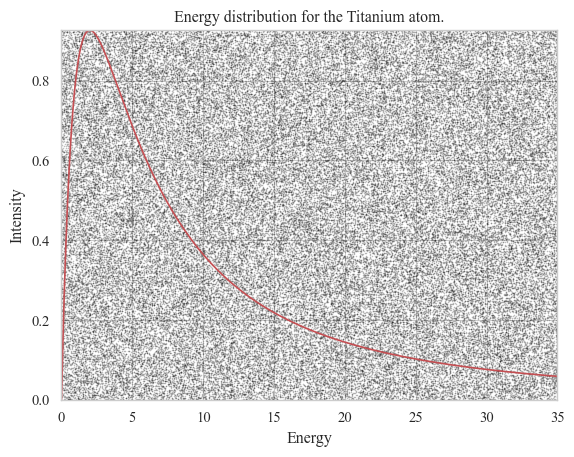

In [4]:
# Create a figure to plot
plt.figure()
plt.xlabel("Energy")
plt.ylabel("Intensity")
plt.title("Energy distribution for the Titanium atom.")
plt.ylim(min(func_energy),max(func_energy))
plt.xlim(min(energy),max(energy))


# Graph of the points 
plt.scatter(random_1,random_2,s=.01, c='k')
plt.plot(energy,func_energy, c='r')
plt.show()

**Histogram Bars (`bins` and `length`):**
- The variable `bins` determines the number of bins or intervals into which the energy range will be divided for creating the histogram. A higher number of bins results in a more detailed histogram.
- `length` calculates the length of each bin based on the maximum energy divided by the number of bins.

**Bars Creation (`bars`):**
- The array `bars` is created to define the edges of each histogram bin. It starts from 0 and extends up to the maximum energy (`np.max(energy)`) with intervals defined by `length`.

**Histogram Initialization (`histogram`):**
- An array `histogram` is initialized to store the frequency of energy values falling within each bin.

**Histogram Generation with Monte Carlo Conditions:**
- A loop iterates through each random point generated (`random_1` and `random_2`) to determine its bin placement in the histogram.
- For each point, a Monte Carlo condition is applied. If the random variable `random_2` is less than or equal to the probability density function evaluated at `random_1`, the point is considered to be within the distribution curve and is counted in the histogram.
- The loop checks which bin the random energy value falls into based on its magnitude compared to the edges defined in `bars`. If the Monte Carlo condition is satisfied, the corresponding bin count in the `histogram` array is incremented.


In [5]:
# Histogram Bars
bins = 100
lenght = np.max(energy)/bins

# Bars creation
bars = np.arange(0,35,lenght)+lenght

# Histogram Initialization
histogram = np.zeros(len(bars))

# Histogram generated with the montecarlo conditons
for position in range(len(random_1)):
    flag = False
    if random_2[position]<=100*random_1[position]/(random_1[position]+4)**3:
        flag = True
    for i in range(bins):
        if i == 0:
            if random_1[position] < bars[i] and flag == True:
                histogram[0] += 1
                break
        else:
            if random_1[position] > bars[i-1] and random_1[position] < bars[i] and flag == True:
                histogram[i] += 1
                break

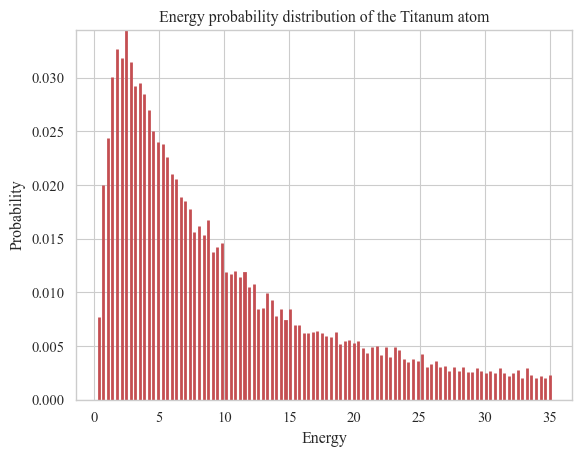

In [6]:
# Histogram plotting
plt.figure()
histogram_prob = histogram/histogram.sum()
plt.bar(bars, histogram_prob, width = 0.001, linewidth = 2, edgecolor='r')
plt.ylim(0,max(histogram_prob))

plt.xlabel("Energy")
plt.ylabel("Probability")
plt.title("Energy probability distribution of the Titanum atom")
plt.show()

## Sputter Yield and collision cascade

### `monte_carlo_sputter_yield`

This function performs a Monte Carlo simulation to calculate the sputter yield for a given number of particles and range of angles.

**Parameters:**
- `mass_ion`: Mass of the ion in atomic mass units.
- `mass_target`: Mass of the target atom in atomic mass units.
- `ion_energy`: Energy of the ion in eV.
- `surface_binding_energy`: Surface binding energy of the target atom in eV.
- `n_particles`: Number of particles to simulate.
- `angle_range`: Range of angles to simulate in radians (min, max).
- `n`: Exponent in the sputter yield formula (default: 1.5).

**Returns:**
- `sputter_yield`: The sputter yield.

### `simulate_collision_cascade`

This function simulates a collision cascade within a lattice due to ion bombardment.

**Parameters:**
- `num_atoms`: Number of atoms along each dimension of the lattice.
- `num_ions`: Number of ions.
- `initial_energy`: Initial energy of the ions.
- `collision_threshold`: Energy threshold for a collision.
- `energy_transfer`: Fraction of energy transferred in a collision.
- `surface_binding_energy`: Surface binding energy.

**Returns:**
- `sputter_yield`: The sputter yield.
- `lattice`: The lattice representing the energy distribution after the collision cascade.

### Example Usage:
- Defines the parameters for the simulation.
- Runs the simulation using `simulate_collision_cascade`.
- Visualizes the lattice after the collision cascade using `plt.imshow`.
- Displays the sputter yield.


In [7]:
def monte_carlo_sputter_yield(mass_ion, mass_target, ion_energy, surface_binding_energy, n_particles, angle_range, n=1.5):
    """
    Perform a Monte Carlo simulation to calculate the sputter yield for a given number of particles and range of angles.

    Parameters:
    mass_ion (float): mass of the ion in atomic mass units
    mass_target (float): mass of the target atom in atomic mass units
    ion_energy (float): energy of the ion in eV
    surface_binding_energy (float): surface binding energy of the target atom in eV
    n_particles (int): number of particles to simulate
    angle_range (tuple): range of angles to simulate in radians (min, max)
    n (float): exponent in the sputter yield formula (default: 1.5)

    Returns:
    sputter_yield (float): the sputter yield
    """

    # Generate random angles within the given range
    angles = np.random.uniform(angle_range[0], angle_range[1], n_particles)

    # Calculate the sputter yield for each particle
    sputter_yield = (4 / np.pi) * (mass_ion / mass_target) * (ion_energy / surface_binding_energy) * np.sin(angles)**n * np.exp(-2 / n * (surface_binding_energy / ion_energy) * (mass_ion / mass_target)**0.5 * np.cos(angles))

    # Return the mean sputter yield
    return np.mean(sputter_yield)

# Example usage
# mass_ion = 1.0  # mass of the ion in atomic mass units
# mass_target = 1.0  # mass of the target atom in atomic mass units
# ion_energy = 1000.0  # energy of the ion in eV
# surface_binding_energy = 10.0  # surface binding energy of the target atom in eV
# n_particles = 10000  # number of particles to simulate
# angle_range = (np.radians(30), np.radians(60))  # range of angles to simulate in radians

# sputter_yield = monte_carlo_sputter_yield(mass_ion, mass_target, ion_energy, surface_binding_energy, n_particles, angle_range)
# print("The sputter yield is:", sputter_yield)

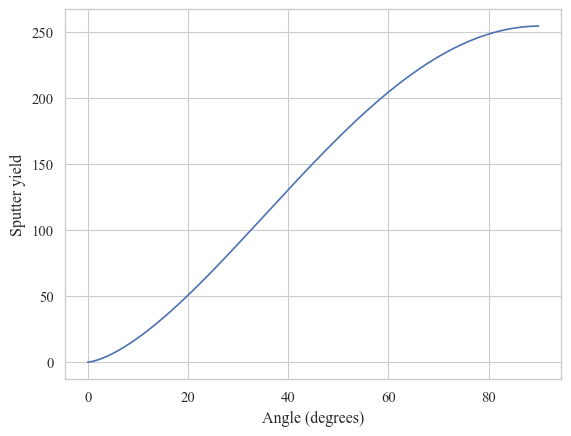

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sputter_yield_graph(mass_ion, mass_target, ion_energy, surface_binding_energy, angle_range, n=1.5):
    angles = np.linspace(angle_range[0], angle_range[1], 1000)  # create 100000 angles between angle_range[0] and angle_range[1]
    sputter_yield = np.zeros_like(angles)
    for i, angle in enumerate(angles):
        sputter_yield[i] = (4 / np.pi) * (mass_ion / mass_target) * (ion_energy / surface_binding_energy) * np.sin(angle)**n * np.exp(-2 / n * (surface_binding_energy / ion_energy) * (mass_ion / mass_target)**0.5 * np.cos(angle))
    return sputter_yield

mass_ion = 1.0  # mass of the ion in atomic mass units
mass_target = 1.0  # mass of the target atom in atomic mass units
ion_energy = 1000.0  # energy of the ion in eV
surface_binding_energy = 5.0  # surface binding energy of the target atom in eV
angle_range = (np.radians(0), np.radians(90))  # range of angles to simulate in radians

sputter_yield = sputter_yield_graph(mass_ion, mass_target, ion_energy, surface_binding_energy, angle_range)

angles = np.linspace(np.radians(0), np.radians(90),1000)

plt.plot(np.degrees(angles), sputter_yield)
plt.xlabel('Angle (degrees)')
plt.ylabel('Sputter yield')
plt.show()

#### Yield (With probability determines the number of atoms that will be obtained from the sputter proccess considering the Argon Ions)

We can use collision cascade to calculate sputter yield provided sputtering occurs when the energy of the collision is greater than the surface binding enrgy

Example usage:


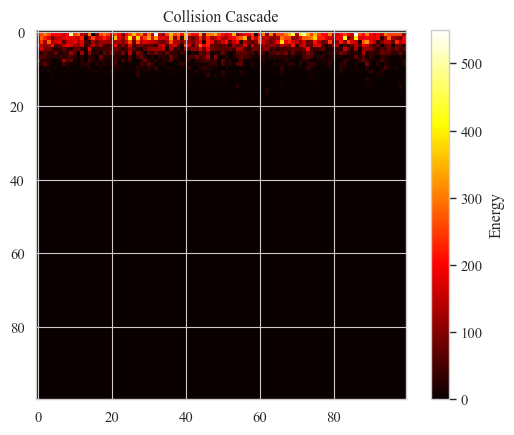

Sputter yield: 0.904


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_collision_cascade(num_atoms, num_ions, initial_energy, collision_threshold, energy_transfer, surface_binding_energy):
    # Initialize the lattice
    lattice = np.zeros((num_atoms, num_atoms))

    # Initialize a set to store positions of sputtered atoms
    sputtered_positions = set()

    def collide_ion():
        ion_position = np.array([0, np.random.randint(num_atoms)])
        ion_energy = initial_energy

        while ion_energy > collision_threshold:
            # The ion moves to the right
            ion_position[0] += 1

            # If the ion is outside the lattice, stop the simulation for this ion
            if ion_position[0] >= num_atoms:
                break

            # If there is a collision
            if np.random.rand() < energy_transfer:
                # Transfer energy from the ion to the atom
                energy_loss = ion_energy * energy_transfer
                ion_energy -= energy_loss
                lattice[tuple(ion_position)] += energy_loss

                # If the energy transferred to the atom is greater than or equal to the surface binding energy, mark it as sputtered
                if energy_loss >= surface_binding_energy:
                    sputtered_positions.add(tuple(ion_position))

    # Perform collision cascade
    for _ in range(num_ions):
        collide_ion()

    # Calculate the sputter yield
    sputter_yield = len(sputtered_positions) / num_ions

    return sputter_yield, lattice

print('Example usage:')
# Define the parameters of the simulation
num_atoms = 100  # Number of atoms along each dimension of the lattice
num_ions = 1000  # Number of ions
initial_energy = 100  # Initial energy of the ions
collision_threshold = 15  # Energy threshold for a collision
energy_transfer = 0.5  # Fraction of energy transferred in a collision
surface_binding_energy = 10  # Surface binding energy

# Run the simulation
sputter_yield, lattice = simulate_collision_cascade(num_atoms, num_ions, initial_energy, collision_threshold, energy_transfer, surface_binding_energy)

# Visualize the lattice
plt.imshow(lattice, cmap='hot', interpolation='nearest')
plt.colorbar(label='Energy')
plt.title('Collision Cascade')
plt.show()

print('Sputter yield:', sputter_yield)


In [10]:
# Number of Argon Ions
Ar = 1000
energyAr = 10 #ev

angle_range = (np.radians(30), np.radians(90))
# Yield value
# for a specific case, maintain an unitary yield value
Yield_value, cascade_lattice = simulate_collision_cascade(1000, 1000, 10, 5, 0.5, 0.0129)
print(Yield_value)
Yamamura = round(monte_carlo_sputter_yield(39.94, 47.86, energyAr, 0.0129, Ar, angle_range))

# Number of used titanium particles are the argon particles times the yield
print("sputtering yield using Yamamura formula: ",Yamamura)
print("sputtering yield using Monte Carlo collision cascade: ",Yield_value*Ar)
Ti_=int(Yield_value*Ar)

0.855
sputtering yield using Yamamura formula:  623
sputtering yield using Monte Carlo collision cascade:  855.0


Calculating Backscattering of ions

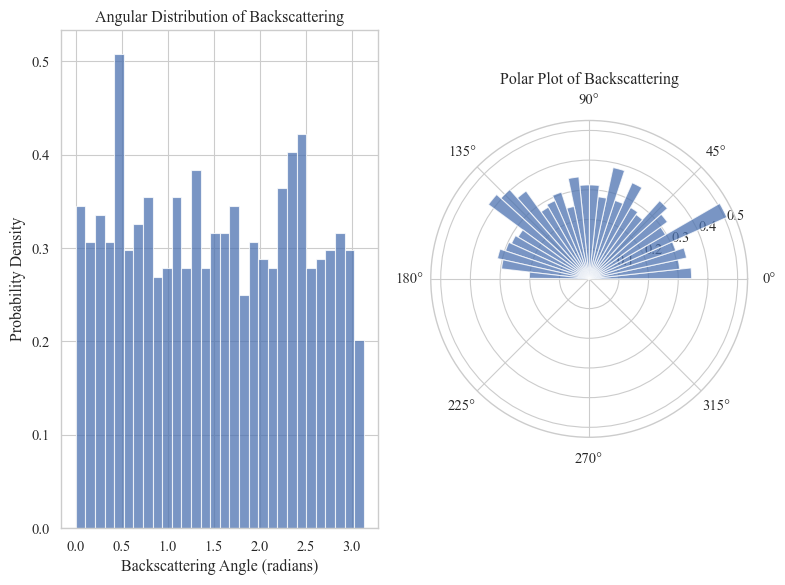

In [11]:
def simulate_backscattering(num_ions, initial_energy, surface_binding_energy):
    # Initialize a list to store backscattering angles
    backscattering_angles = []

    for _ in range(num_ions):
        # Randomly choose initial direction (angle) of the ion
        theta = np.random.uniform(0, np.pi)

        # Calculate energy loss due to interaction with surface
        energy_loss = initial_energy - surface_binding_energy

        # If the energy loss is greater than zero, the ion undergoes backscattering
        if energy_loss > 0:
            # Calculate the final backscattering angle
            backscattering_angle = np.pi - theta
            backscattering_angles.append(backscattering_angle)

    return backscattering_angles

# Define the parameters of the simulation
num_ions = 1000  # Number of ions
initial_energy = 100  # Initial energy of the ions
surface_binding_energy = 10  # Surface binding energy

# Run the simulation
backscattering_angles = simulate_backscattering(num_ions, initial_energy, surface_binding_energy)

# Visualize the angular distribution of backscattering
plt.figure(figsize=(8, 6))

# Histogram
plt.subplot(121)
plt.hist(backscattering_angles, bins=30, density=True, alpha=0.75)
plt.xlabel('Backscattering Angle (radians)')
plt.ylabel('Probability Density')
plt.title('Angular Distribution of Backscattering')

# Polar plot
plt.subplot(122, polar=True)
plt.hist(backscattering_angles, bins=30, density=True, alpha=0.75)
plt.title('Polar Plot of Backscattering')
plt.tight_layout()
plt.show()


# Eroded atom
###  Determine the primary characteristics of a particle to generate some properties: speed, angle and initial position. 

In [12]:
# Function to generate a particle with an allowed speed and an angle, with initial condition
def create_particle(bars,histogram,lenght,target_min,target_max):
    # To select the value of speed from the histogram
    
    # Boltzmann Constant
    k=1.380648813*10**(-23)
    # Temperature
    t=300
    #Energy of particles
    energyAr=3/2*k*t/(1.6*10**(-19))
    velocity = np.random.choice(bars, p=histogram)*energyAr
    
    # Giving a specific value of the velocity with a uniform distribution
    particle_v = np.random.uniform(low=(velocity-lenght),high=velocity)
    
    #Giving a specific value for the angle from 0 to pi
    particle_a = np.random.uniform(0, np.pi)
    angle = np.random.uniform(0,2*np.pi)
    
    #Defining the initial position of the value which got off from the target
    posx = np.random.uniform(target_min,target_max)
    posy = 0
    posz = np.random.uniform(target_min,target_max)
    
    # Save the three positions of the particle in a vector
    pos = [posx,posy,posz]
    
    # All the information of the particle can be saved in a list
    particle = [particle_v,particle_a,pos, angle]
    return particle

## Vectorized monte carlo go to the next cell for the working code
# (very fast but Not working)

In [13]:
Ti = 100_00
test = []

# target
target_min = 3
target_max = 5

# Sustrate
sustrate_min = -5
sustrate_max = 5

#Creation of particles

particlesTi = [create_particle(bars,histogram_prob,
                               lenght,target_min, target_max)
               for i in range(Ti)]

v_ = np.array([particlesTi[i][0] for i in range(Ti)])[:,None]
a_ = np.array([particlesTi[i][1] for i in range(Ti)])[:,None]
pos_ = np.array([particlesTi[i][2] for i in range(Ti)])
angle_ = np.array([particlesTi[i][3] for i in range(Ti)])[:,None]

countgood = 0
countbad = 0

#Dimensions of the camera
camxmin = -11
camxmax = 11

camzmin = -11
camzmax = 11

camymin = 0
camymax = 20

# Save Results 
results_ = []
results_c = []
good_values = []


vectorpos = []
vectorpos.append(pos_) #Trajectory append

operations = True



"""THIS IS THE MIDDLE PATH OF PARTICLES BUT WE ARE NOT TAKING THE REAL ONE YET"""
recorrido = .1

#Threshold value for collision
tresh = 1/np.exp(1)

for i in tqdm(range(0,10000, 1)):
    # Determine if the particle collides depending on a "tresh" threshold value
    collision = np.random.uniform(0,1,a_.shape[0])
    
    collisiontrue = collision<tresh

    # a ---> True b---> False: collisiontrue

    modification = 7*recorrido

    a = np.concatenate([(recorrido*np.cos(a_)*np.cos(angle_) + modification*np.sin(np.random.uniform(0,2*np.pi,a_.shape[0]))[:,None]),
                    (recorrido*np.sin(a_) + modification*np.sin(np.random.uniform(0,2*np.pi,a_.shape[0]))[:,None]),
                    (recorrido*np.cos(a_)*np.cos(angle_) + modification*np.sin(np.random.uniform(0,2*np.pi,a_.shape[0]))[:,None])],axis = 1)

    b = np.concatenate([recorrido*np.cos(a_)*np.cos(angle_),
         recorrido*np.sin(a_),
         recorrido*np.sin(a_)*np.sin(angle_)],axis=1)
    
     
    pos_ = pos_ + a*collisiontrue[:,None] + b*(~collisiontrue)[:,None]

    op1 = np.abs(pos_[:,0]) > camxmax
    op2 = np.abs(pos_[:,-1]) > camzmax
    op3 = pos_[:,1] < camymin
    op4 = pos_[:,1] >= camymax

    
    op5 = (pos_[:,1] >= camymax)*(np.abs(pos_[:,0])<=sustrate_max)*(np.abs(pos_[:,-1])<=sustrate_max) #Colour; objective
    op = ~(op1+op2+op3+op4+op5)
    vectorpos.append(pos_)
    
    removed  = set(np.where(~op)[0].tolist())
    accepted = set(np.where(op)[0].tolist()) - set(np.where(op5)[0].tolist())
    rejected = set(np.where(op)[0].tolist()) - set(np.where(~op5)[0].tolist())
    
    test.append(len(list(removed)))
    color = np.array(['r']*a_.shape[0])
    color_green = list(accepted) #Indices for which the color is green
    color[color_green] = 'g'
    countgood += len(color_green)
    color_red = list(rejected) #Indices for which the color is red
    countbad += len(color_red)
    good_values.append(countgood)
    
    results_.append(vectorpos)
    results_c.append(color)
    
    v_ = v_[op,:]
    a_ = a_[op,:]
    pos_ = pos_[op,:]
    angle_ = angle_[op,:]

    if (op == True).any():
        pass
    else:
        print("Complete")
        break

        

counttotal=countgood+countbad
print("countgood",countgood)
print("Count Total",counttotal)
total_particles_sub_hit=countgood/counttotal
print(f"percentage incident on substrate: {total_particles_sub_hit*100}%")

  0%|          | 0/10000 [00:00<?, ?it/s]

Complete
countgood 637561
Count Total 637561
percentage incident on substrate: 100.0%


## MONTE CARLO for sputtered particle trajectoreis(whether they reach they target or not)

In [14]:
Ti = Ti_
test = []
# target
target_min = 3
target_max = 5

# Sustrate
sustrate_min = -5
sustrate_max = 5

#Creation of particles
particlesTi = [create_particle(bars,histogram_prob,
                               lenght,target_min, target_max)
               for i in range(Ti)]
countgood = 0
countbad = 0

#Dimensions of the camera
camxmin = -11
camxmax = 11

camzmin = -11
camzmax = 11

camymin = 0
camymax = 20

# Save Results 
results_x = []
results_y = []
results_z = []
results_c = []
good_values = []
c = 0
for particle in tqdm(particlesTi):
    objective=False
    #Define position vectors
    vectorposx = []
    vectorposy = []
    vectorposz = []

    posx = particle[2][0]
    posy = particle[2][1]
    posz = particle[2][2]

    vectorposx.append(posx)
    vectorposy.append(posy)
    vectorposz.append(posz)
    operations = True


    """THIS IS THE MIDDLE PATH OF PARTICLES BUT WE ARE NOT TAKING THE REAL ONE YET"""
    #impact parameter
    recorrido = .1

    #Threshold value for collision
    tresh = 1/np.exp(1)

    
    while operations==True:
        # Determine if the particle collides depending on a "tresh" threshold value
        collision = np.random.uniform(0,1)

        if collision < tresh:
            collisiontrue = True
        else: 
            collisiontrue = False

        # Determine the mechanics of the particle when it does not collide
        if collisiontrue == False:
            posx = posx + recorrido*np.cos(particle[1])*np.cos(particle[3])
            posy = posy + recorrido*np.sin(particle[1])
            posz = posz + recorrido*np.sin(particle[1])*np.sin(particle[3])
            pos = [posx,posy,posz]

        # Determine the mechanics of the particle when it collides
        elif collisiontrue == True:
            
            modification = 7*recorrido
            modificacion = 7*recorrido
            #particle[1]=particle[1]+.7*np.random.uniform(0,2*np.pi)

            posx = posx + recorrido*np.cos(particle[1])*np.cos(particle[3]) + modificacion*np.sin(np.random.uniform(0,2*np.pi))
            posy = posy + recorrido*np.sin(particle[1]) + modificacion*np.sin(np.random.uniform(0,2*np.pi))
            posz = posz + recorrido*np.sin(particle[1])*np.sin(particle[3]) + modificacion*np.sin(np.random.uniform(0,2*np.pi))
            pos = [posx,posy,posz]
            
        #Evaluate if the particle is still in the box
        if abs(posx) > camxmax:
            operations = False
        elif abs(posz) > camzmax:
            operations = False
        elif posy < camymin:
            operations = False
        elif (posy >= camymax) and (abs(posx) >= sustrate_max) and (abs(posz) >= sustrate_max):
            operations = False
        elif (posy >= camymax) and (abs(posx) >= sustrate_max) and (abs(posz) <= sustrate_max):
            operations = False    
        elif (posy >= camymax) and (abs(posx) <= sustrate_max) and (abs(posz) >= sustrate_max):
            operations = False  
        elif (posy >= camymax) and (abs(posx) <= sustrate_max) and (abs(posz) <= sustrate_max):
            operations = False
            objective=True
        if operations == True:
            c = c+1
        vectorposx.append(posx)
        vectorposy.append(posy)
        vectorposz.append(posz)
        
        particle[2]=pos
    test.append(c)
    if objective == True:
        color = 'g'
        #reaching substrate
        countgood += 1
        #plt.axes(projection='3d').plot(vectorposx, vectorposz, vectorposy)
    elif objective == False:
        #not reaching substrate
        countbad += 1
        color = 'r'
    good_values.append(countgood)
    #plt.plot(vectorposx,vectorposy,c=color,linewidth=.1)

    # Result vectors
    results_x.append(vectorposx)
    results_y.append(vectorposy)
    results_z.append(vectorposz)
    results_c.append(color)

#total count
counttotal=countgood+countbad
print("countgood",countgood)
print("Count Total",counttotal)
total_particles_sub_hit=countgood/counttotal
print(f"percentage incident on substrate: {total_particles_sub_hit*100}%")

  0%|          | 0/855 [00:00<?, ?it/s]

countgood 16
Count Total 855
percentage incident on substrate: 1.8713450292397662%


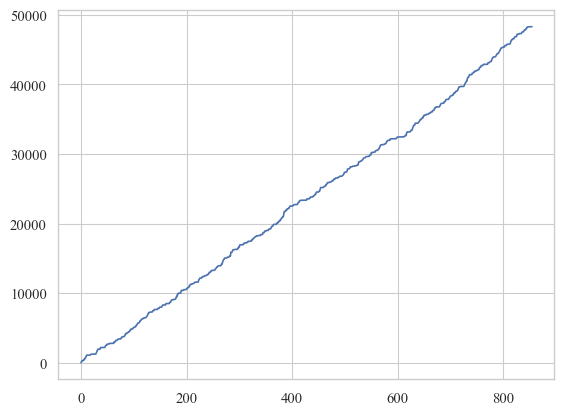

In [15]:
plt.plot(test)

# visualising the particle trajectories of sputtered particles
### (Green ones reached the target)

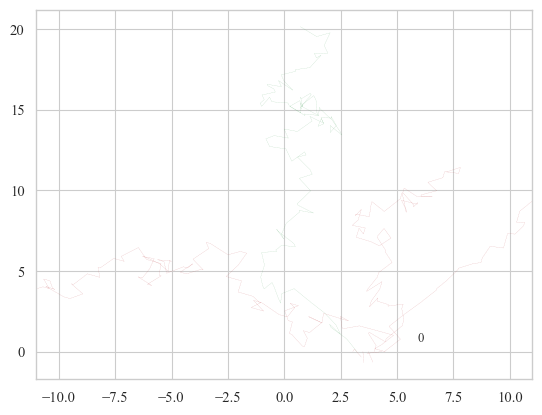

In [17]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim(camxmin,camxmax)
#plt.ylim(camymin,camymax)
text = plt.text(5.9,.58,f' 0', fontsize=9)
#plotter = ax1.plot(results_x[0][:-3],results_y[0][:-3], c='k')


#def a2(i):
#    plotter.set_data(results_x[0][0:i], results_y[0][0:i])


mult = int(Ti/100)
def ani(i):
    global mult,Ti
   # How many plot lines at the same time would you like to plot
    text.set_text(f'{i}')
    for j in range(mult):
        plot = ax.plot(results_x[mult*i+j],
                      results_y[mult*i+j],
                      color = results_c[mult*i+j],
                      linewidth=.1, ls='--')

anim = animation.FuncAnimation(fig, ani, frames=int(Ti/mult), repeat=False)

MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


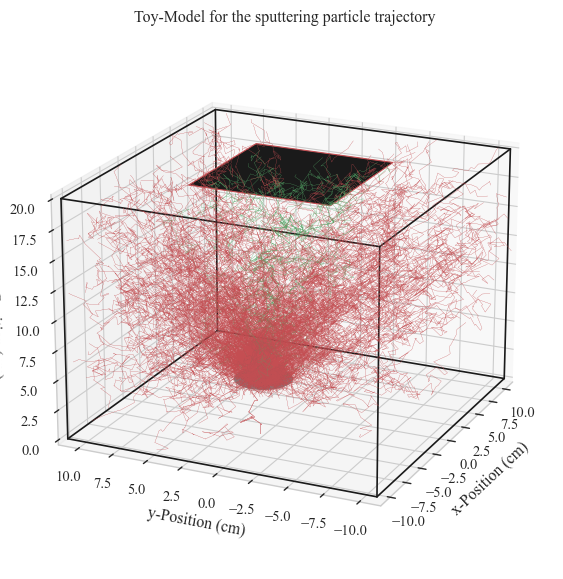

In [18]:
fig3d  = plt.figure(figsize=(7,7))
ax3d = fig3d.add_subplot(111, projection='3d')
plot = ax3d.plot([], [], [])

#Draw the box
ax3d.plot([camxmin,camxmax],[camzmin,camzmin],[camymin,camymin], c='k', zorder=1)
ax3d.plot([camxmin,camxmax],[camzmax,camzmax],[camymin,camymin], c='k', zorder=1)
ax3d.plot([camxmin,camxmin],[camzmin,camzmax],[camymin,camymin], c='k', zorder=1)
ax3d.plot([camxmax,camxmax],[camzmin,camzmax],[camymin,camymin], c='k', zorder=1)
ax3d.plot([camxmin,camxmax],[camzmin,camzmin],[camymax,camymax], c='k', zorder=1)
ax3d.plot([camxmin,camxmax],[camzmax,camzmax],[camymax,camymax], c='k', zorder=1)
ax3d.plot([camxmin,camxmin],[camzmin,camzmax],[camymax,camymax], c='k', zorder=1)
ax3d.plot([camxmax,camxmax],[camzmin,camzmax],[camymax,camymax], c='k', zorder=1)
ax3d.plot([camxmin,camxmin],[camzmin,camzmin],[camymin,camymax], c='k', zorder=1)
ax3d.plot([camxmax,camxmax],[camzmin,camzmin],[camymin,camymax], c='k', zorder=1)
ax3d.plot([camxmin,camxmin],[camzmax,camzmax],[camymin,camymax], c='k', zorder=1)
ax3d.plot([camxmax,camxmax],[camzmax,camzmax],[camymin,camymax], c='k', zorder=1)

# Set the box limits
ax3d.set_ylim(camzmax,camzmin,)
ax3d.set_zlim(camymin,camymax)
ax3d.set_xlim(camxmax,camxmin)


# Draw the tarjet
target_circle = Circle((4, 4), 2, color='Gray')
target_circle.set_zorder(0)
ax3d.add_patch(target_circle)
art3d.pathpatch_2d_to_3d(target_circle, z=camymin, zdir="z")

#Draw the sustrate
x = [-1*sustrate_max,sustrate_max,sustrate_max,-1*sustrate_max]
y = [-1*sustrate_max,-1*sustrate_max,sustrate_max,sustrate_max]
z = [camymax,camymax,camymax,camymax]
verts = [list(zip(x,y,z))]
rectangle = Poly3DCollection(verts)
rectangle.set_color('r')
rectangle.set_facecolor('k')
rectangle.set_alpha(1)
rectangle.set_zorder(10)
ax3d.add_collection3d(rectangle)
ax3d.view_init(20,25)

def ani3d(i):
    global mult,Ti
   # How many plot lines at the same time would you like to plot
    for j in range(mult):
        plot = ax3d.plot(results_x[mult*i+j],
                      results_z[mult*i+j],
                      results_y[mult*i+j],
                      color = results_c[mult*i+j],
                      linewidth=.1, zorder=3)
    ax3d.view_init(20,25+i*360/(int(Ti/mult)))
    
plt.title('Toy-Model for the sputtering particle trajectory')
ax3d.set_xlabel('x-Position (cm)')
ax3d.set_ylabel('y-Position (cm)')
ax3d.set_zlabel('z-Position (cm)')
anim3d = animation.FuncAnimation(fig3d, ani3d, frames=int(Ti/mult), repeat=False)
anim3d.save('interference_pattern.gif', writer='imagemagick')
anim3d.save('sputtering_simulation.gif', writer='ffmpeg')